In [4]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

nfl = pd.read_csv(
    filepath_or_buffer = "data/nfl.csv",
    parse_dates = ["Birthday"],
)

pd.DataFrame(nfl).info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1655 entries, 0 to 1654
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Name      1655 non-null   object        
 1   Team      1655 non-null   object        
 2   Position  1655 non-null   object        
 3   Birthday  1655 non-null   datetime64[ns]
 4   Salary    1655 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 64.8+ KB


In [3]:
nfl

,Name,Team,Position,Birthday,Salary
0,Tremon Smith,Philadelphia Eagles,RB,1996-07-20,570000
1,Shawn Williams,Cincinnati Bengals,SS,1991-05-13,3500000
2,Adam Butler,New England Patriots,DT,1994-04-12,645000
3,Derek Wolfe,Denver Broncos,DE,1990-02-24,8000000
4,Jake Ryan,Jacksonville Jaguars,OLB,1992-02-27,1000000
...,...,...,...,...,...
1650,Bashaud Breeland,Kansas City Chiefs,CB,1992-01-30,805000
1651,Craig James,Philadelphia Eagles,CB,1996-04-29,570000
1652,Jonotthan Harrison,New York Jets,C,1991-08-25,1500000
1653,Chuma Edoga,New York Jets,OT,1997-05-25,495000


In [23]:
now_time = dt.datetime.now()
nfl["age"] = (
    (now_time - nfl["Birthday"])/365
)
nfl
# print(now_time)

,Name,Team,Position,Birthday,Salary,age
0,Tremon Smith,Philadelphia Eagles,RB,1996-07-20,570000,29 days 12:47:56.284802898
1,Shawn Williams,Cincinnati Bengals,SS,1991-05-13,3500000,34 days 17:24:06.147816597
2,Adam Butler,New England Patriots,DT,1994-04-12,645000,31 days 19:22:27.517679610
3,Derek Wolfe,Denver Broncos,DE,1990-02-24,8000000,35 days 22:31:49.709460432
4,Jake Ryan,Jacksonville Jaguars,OLB,1992-02-27,1000000,33 days 22:19:59.572474131
...,...,...,...,...,...,...
1650,Bashaud Breeland,Kansas City Chiefs,CB,1992-01-30,805000,34 days 00:10:27.517679610
1651,Craig James,Philadelphia Eagles,CB,1996-04-29,570000,29 days 18:11:26.695761802
1652,Jonotthan Harrison,New York Jets,C,1991-08-25,1500000,34 days 10:33:48.065624816
1653,Chuma Edoga,New York Jets,OT,1997-05-25,495000,28 days 16:28:52.175213857


In [4]:
nfl.nunique()

Name        1643
Team          32
Position      21
Birthday    1316
Salary       403
dtype: int64

In [10]:
teams = nfl.groupby("Team")
result = teams["Salary"].agg(
    Total_Salary='sum',
    Average_Salary='mean'
).sort_values(by="Total_Salary", ascending=False)

result.head()
# print(type(result))
print(result)


                      Total_Salary  Average_Salary
Team                                              
Minnesota Vikings        155149139    2.873132e+06
Atlanta Falcons          117746617    2.221634e+06
Tennessee Titans         117729785    2.559343e+06
Tampa Bay Buccaneers     117353567    2.496884e+06
Dallas Cowboys           115516873    2.179564e+06
New Orleans Saints       113325306    2.060460e+06
San Francisco 49Ers      112388711    2.043431e+06
Los Angeles Chargers     111960988    2.073352e+06
Kansas City Chiefs       105963286    1.892202e+06
Cleveland Browns         101860161    2.078779e+06
Washington Redskins       98179662    1.753208e+06
Houston Texans            97575828    1.876458e+06
New England Patriots      96962664    1.978830e+06
New York Giants           96857465    1.862644e+06
Chicago Bears             96597551    1.822595e+06
Los Angeles Rams          93774079    1.803348e+06
Denver Broncos            93299819    1.727774e+06
Seattle Seahawks          92970

In [29]:
teams.get_group('Minnesota Vikings').head()

,Name,Team,Position,Birthday,Salary
12,Olabisi Johnson,Minnesota Vikings,WR,1997-03-17,647500
52,Adam Thielen,Minnesota Vikings,WR,1990-08-22,5850000
71,Josh Kline,Minnesota Vikings,G,1989-10-29,1450000
113,Sean Mannion,Minnesota Vikings,QB,1992-04-25,805000
131,Linval Joseph,Minnesota Vikings,NT,1988-10-10,8900000


<Axes: ylabel='Team'>

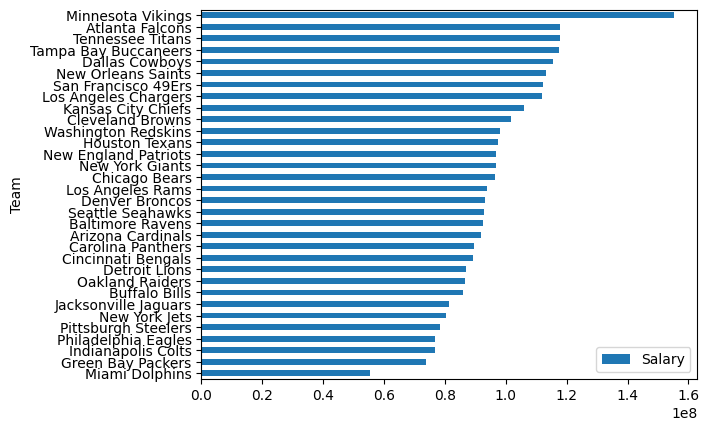

In [13]:

teams["Salary"].sum().sort_values(ascending=True).plot(kind = "barh", legend = True)

<Axes: ylabel='Salary'>

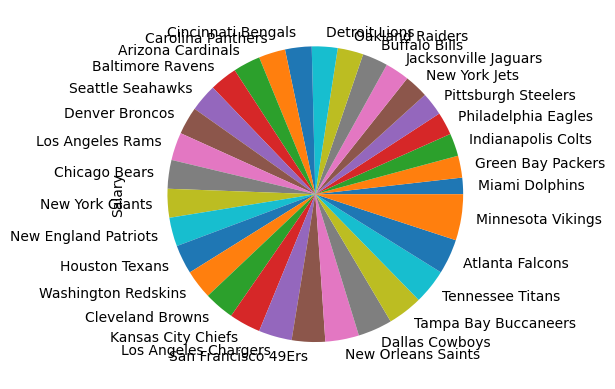

In [12]:
teams["Salary"].sum().sort_values(ascending=True).plot(kind = "pie")